In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#pandas：
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
# Concatenating train & test
test_id = test['id']
train_sales = train['sales']

train['istrain'] = 1
test['istrain'] = 0
df = pd.concat([train,test.drop(['id'],1)], sort=False)
df['date'] = pd.to_datetime(df['date'])
print('Combined df shape:{}'.format(df.shape))

Combined df shape:(958000, 5)


## 1. Feature Engineering

#### 1.1 time features

In [3]:
# Extracting date features
df['dayofmonth'] = df.date.dt.day
df['dayofyear'] = df.date.dt.dayofyear
df['dayofweek'] = df.date.dt.dayofweek
# df['week'] = df.date.dt.week
df['month'] = df.date.dt.month
df['quarter'] = df.date.dt.quarter
df['year'] = df.date.dt.year
df['weekofyear'] = df.date.dt.weekofyear
df['is_month_start'] = (df.date.dt.is_month_start).astype(int)
df['is_month_end'] = (df.date.dt.is_month_end).astype(int)
df.head(2)

,date,store,item,sales,istrain,dayofmonth,dayofyear,dayofweek,month,quarter,year,weekofyear,is_month_start,is_month_end
0,2013-01-01,1,1,13.0,1,1,1,1,1,1,2013,1,1,0
1,2013-01-02,1,1,11.0,1,2,2,2,1,1,2013,1,0,0


In [4]:
df.shape

(958000, 14)

#### 1.2 aggregated sales values

In [5]:
def create_sales_agg_features(df, gpby_cols, target_col, agg_funcs):
    '''
    Creates various sales agg features with given agg functions  
    '''
    gpby = df.groupby(gpby_cols)
    newdf = df[gpby_cols].drop_duplicates().reset_index(drop=True)
    for agg_name, agg_func in agg_funcs.items():
        aggdf = gpby[target_col].agg(agg_func).reset_index()
        aggdf.rename(columns={target_col:target_col+'_'+agg_name}, inplace=True)
        newdf = newdf.merge(aggdf, on=gpby_cols, how='left')
    for c in newdf.columns:
        if c not in gpby_cols:
            newdf = newdf.rename(columns={c: gpby_cols[-1]+'_'+c})
    return newdf

In [6]:
# Creating sales dayofmonth aggregated values
dayofmonth_agg = create_sales_agg_features(df,gpby_cols=['store','item','dayofmonth'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
dayofyear_agg = create_sales_agg_features(df,gpby_cols=['store','item','dayofyear'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
dayofweek_agg = create_sales_agg_features(df,gpby_cols=['store','item','dayofweek'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
weekofyear_agg = create_sales_agg_features(df,gpby_cols=['store','item','weekofyear'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales monthwise aggregated values
month_agg = create_sales_agg_features(df,gpby_cols=['store','item','month'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales quarterwise aggregated values
quarter_agg = create_sales_agg_features(df,gpby_cols=['store','item','quarter'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})
# Creating sales yearwise aggregated values
year_agg = create_sales_agg_features(df,gpby_cols=['store','item','year'], 
                                        target_col='sales', 
                                        agg_funcs={'mean':np.mean, 
                                             'median':np.median, 'max':np.max, 
                                             'min':np.min, 'std':np.std})

In [7]:
df = df.merge(dayofmonth_agg,on = ['store','item','dayofmonth'])
df = df.merge(dayofyear_agg,on = ['store','item','dayofyear'])
df = df.merge(dayofweek_agg,on = ['store','item','dayofweek'])
df = df.merge(weekofyear_agg,on = ['store','item','weekofyear'])
df = df.merge(month_agg,on = ['store','item','month'])
df = df.merge(quarter_agg,on = ['store','item','quarter'])
df = df.merge(year_agg,on = ['store','item','year'])

In [8]:
print(df.shape)
df.head(1)

(958000, 49)


,date,store,item,sales,istrain,dayofmonth,dayofyear,dayofweek,month,quarter,year,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std
0,2013-01-01,1,1,13.0,1,1,1,1,1,1,2013,1,1,0,19.916667,19.0,42.0,9.0,6.785557,14.6,13.0,21.0,9.0,5.176872,18.168582,18.0,32.0,5.0,5.819259,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849,16.0,38.0,5.0,5.568069


#### 1.3 Sales Lag Features

In [9]:
# Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df
df_whole = create_sales_lag_feats(df, gpby_cols=['store','item'], target_col='sales', 
                                  lags=[91,98,105,112,119,126,182,364,546,728])
print(df_whole.shape)
df_whole.head(2)

(958000, 59)


,date,store,item,sales,istrain,dayofmonth,dayofyear,dayofweek,month,quarter,year,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728
0,2013-01-01,1,1,13.0,1,1,1,1,1,1,2013,1,1,0,19.916667,19.0,42.0,9.0,6.785557,14.6,13.0,21.0,9.0,5.176872,18.168582,18.0,32.0,5.0,5.819259,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849,16.0,38.0,5.0,5.568069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11.0,1,2,2,2,1,1,2013,1,0,0,18.716667,19.0,38.0,6.0,6.036869,14.4,14.0,19.0,11.0,2.966479,18.793103,19.0,50.0,6.0,5.943590,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849,16.0,38.0,5.0,5.568069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4 Sales Rolling Mean

In [10]:
# Creating sales rolling mean features
def create_sales_rmean_feats(df, gpby_cols, target_col, windows, min_periods=2, 
                             shift=1, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmean', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).mean().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df
df_whole = create_sales_rmean_feats(df_whole, gpby_cols=['store','item'], 
                                    target_col='sales', windows=[364,546], 
                                    min_periods=10, win_type='triang')
df_whole.shape

(958000, 61)

In [11]:
# # Creating sales rolling median features
# def create_sales_rmed_feats(df, gpby_cols, target_col, windows, min_periods=2, 
#                             shift=1, win_type=None):
#     gpby = df.groupby(gpby_cols)
#     for w in windows:
#         df['_'.join([target_col, 'rmed', str(w)])] = \
#             gpby[target_col].shift(shift).rolling(window=w, 
#                                                   min_periods=min_periods,
#                                                   win_type=win_type).median().values +\
#             np.random.normal(scale=1.6, size=(len(df),))
#     return df
# df_whole = create_sales_rmean_feats(df_whole, gpby_cols=['store','item'], 
#                                     target_col='sales', windows=[364,546], 
#                                     min_periods=10, win_type='triang')

#### 1.5 exponentially weighted mean

In [92]:
df_whole.groupby(['store','item'])['sales'].shift(91).ewm(0.9).mean()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
30               NaN
31               NaN
32               NaN
33               NaN
34               NaN
35               NaN
36               NaN
37               NaN
38               NaN
39               NaN
40               NaN
41               NaN
42               NaN
43               NaN
44               NaN
45               NaN
46               NaN
47           

In [12]:
# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df
df_whole = create_sales_ewm_feats(df_whole, gpby_cols=['store','item'], target_col='sales', 
                                  alpha=[0.95, 0.9, 0.8, 0.7, 0.6, 0.5], 
                                  shift=[91,98,105,112,119,126,182,364,546,728])
df_whole.shape

(958000, 121)

In [13]:
#'dayofmonth',,'weekofyear'
df_whole = df_whole.fillna(method='bfill')
df_whole = df_whole.fillna(method='ffill')

In [14]:
df_whole.shape

(958000, 121)

#### 1.6 One Hot Encoding

In [15]:
def one_hot_encoder(df, ohe_cols=['store','item']):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=ohe_cols)
    print('New df shape:{}'.format(df.shape))
    return df

In [16]:
# One-Hot Encoding
df_whole = one_hot_encoder(df_whole, ohe_cols=['store','item','month','quarter','year'])


Creating OHE features..
Old df shape:(958000, 121)
New df shape:(958000, 198)


In [18]:
df_whole.head(5)

,date,sales,istrain,dayofmonth,dayofyear,dayofweek,weekofyear,is_month_start,is_month_end,dayofmonth_sales_mean,dayofmonth_sales_median,dayofmonth_sales_max,dayofmonth_sales_min,dayofmonth_sales_std,dayofyear_sales_mean,dayofyear_sales_median,dayofyear_sales_max,dayofyear_sales_min,dayofyear_sales_std,dayofweek_sales_mean,dayofweek_sales_median,dayofweek_sales_max,dayofweek_sales_min,dayofweek_sales_std,weekofyear_sales_mean,weekofyear_sales_median,weekofyear_sales_max,weekofyear_sales_min,weekofyear_sales_std,month_sales_mean,month_sales_median,month_sales_max,month_sales_min,month_sales_std,quarter_sales_mean,quarter_sales_median,quarter_sales_max,quarter_sales_min,quarter_sales_std,year_sales_mean,year_sales_median,year_sales_max,year_sales_min,year_sales_std,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_rmean_364,sales_rmean_546,sales_lag_91_ewm_0.95,sales_lag_98_ewm_0.95,sales_lag_105_ewm_0.95,sales_lag_112_ewm_0.95,sales_lag_119_ewm_0.95,sales_lag_126_ewm_0.95,sales_lag_182_ewm_0.95,sales_lag_364_ewm_0.95,sales_lag_546_ewm_0.95,sales_lag_728_ewm_0.95,sales_lag_91_ewm_0.9,sales_lag_98_ewm_0.9,sales_lag_105_ewm_0.9,sales_lag_112_ewm_0.9,sales_lag_119_ewm_0.9,sales_lag_126_ewm_0.9,sales_lag_182_ewm_0.9,sales_lag_364_ewm_0.9,sales_lag_546_ewm_0.9,sales_lag_728_ewm_0.9,sales_lag_91_ewm_0.8,sales_lag_98_ewm_0.8,sales_lag_105_ewm_0.8,sales_lag_112_ewm_0.8,sales_lag_119_ewm_0.8,sales_lag_126_ewm_0.8,sales_lag_182_ewm_0.8,sales_lag_364_ewm_0.8,sales_lag_546_ewm_0.8,sales_lag_728_ewm_0.8,sales_lag_91_ewm_0.7,sales_lag_98_ewm_0.7,sales_lag_105_ewm_0.7,sales_lag_112_ewm_0.7,sales_lag_119_ewm_0.7,sales_lag_126_ewm_0.7,sales_lag_182_ewm_0.7,sales_lag_364_ewm_0.7,sales_lag_546_ewm_0.7,sales_lag_728_ewm_0.7,sales_lag_91_ewm_0.6,sales_lag_98_ewm_0.6,sales_lag_105_ewm_0.6,sales_lag_112_ewm_0.6,sales_lag_119_ewm_0.6,sales_lag_126_ewm_0.6,sales_lag_182_ewm_0.6,sales_lag_364_ewm_0.6,sales_lag_546_ewm_0.6,sales_lag_728_ewm_0.6,sales_lag_91_ewm_0.5,sales_lag_98_ewm_0.5,sales_lag_105_ewm_0.5,sales_lag_112_ewm_0.5,sales_lag_119_ewm_0.5,sales_lag_126_ewm_0.5,sales_lag_182_ewm_0.5,sales_lag_364_ewm_0.5,sales_lag_546_ewm_0.5,sales_lag_728_ewm_0.5,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,2013-01-01,13.0,1,1,1,1,1,1,0,19.916667,19.0,42.0,9.0,6.785557,14.6,13.0,21.0,9.0,5.176872,18.168582,18.0,32.0,5.0,5.819259,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.506849,16.0,38.0,5.0,5.568069,11.898429,12.105379,14.702494,14.100351,12.674168,15.825443,8.878292,14.736398,14.721113,14.637217,9.97547,8.821067,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2013-01-02,11.0,1,2,2,2,1,0,0,18.716667,19.0,38.0,6.0,6.036869,14.4,14.0,19.0,11.0,2.966479,18.793103,19.0,50.0,6.0,5.943590,13.970588,13.5,26.0,5.0,4.238963,13.709677,13.0,29.0,5.0,4.397413,15.334812,15.0,31.0,4.0,4.826879,16.5

In [21]:
df_sales = df_whole['sales']
df_istrain = df_whole['istrain']
df_traintest = df_whole.drop(['sales','date','istrain'],1)
df_traintest.shape

(958000, 195)

#### 1.7 Min Max Normalize

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_traintest_norm = pd.DataFrame(scaler.fit_transform(df_traintest))

/Users/henry/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
df_traintest_norm.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194
0,0.000000,0.00000,0.166667,0.0,1.0,0.0,0.079981,0.079812,0.104265,0.134328,0.098244,0.064356,0.054217,0.066667,0.065217,0.107681,0.064131,0.063492,0.043269,0.068493,0.075868,0.040515,0.038462,0.0553,0.046296,0.089291,0.033138,0.029412,0.051643,0.055556,0.0484,0.04329,0.041667,0.038462,0.056338,0.047581,0.05263,0.051724,0.076555,0.075758,0.057065,0.059382,0.062908,0.073722,0.071917,0.066032,0.070428,0.051397,0.071099,0.073978,0.070394,0.024729,0.023194,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.051612,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.051133,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.033333,0.00274,0.333333,0.0,0.0,0.0,0.068487,0.079812,0.085308,0.089552,0.072960,0.063119,0.060241,0.057778,0.079710,0.061704,0.069152,0.071429,0.129808,0.082192,0.080493,0.040515,0.038462,0.0553,0.046296,0.089291,0.033138,0.029412,0.051643,0.055556,0.0484,0.04329,0.041667,0.038462,0.056338,0.047581,0.05263,0.051724,0.076555,0.075758,0.057065,0.059382,0.062908,0.073722,0.071917,0.066032,0.070428,0.051397,0.071099,0.073978,0.070394,0.024729,0.023194,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.054514,0.051612,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.052781,0.051133,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.050752,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.052361,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.054092,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,0.055935,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 1.8 PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 31)
pca.fit(df_traintest_norm)

PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

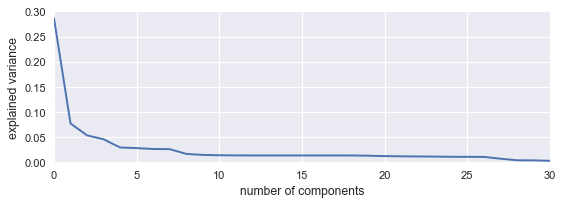

In [31]:
import seaborn as sns
plt.style.use('seaborn')
plt.figure(figsize=(8,2.5),dpi = 80)
plt.plot(pca.explained_variance_ratio_)
plt.xlim([0,30])
plt.ylim([0,0.3])
plt.xlabel('number of components')
plt.ylabel('explained variance');

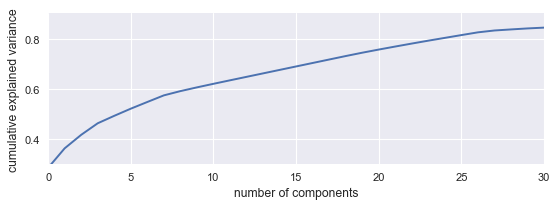

In [32]:
plt.figure(figsize=(8,2.5),dpi = 80)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim([0,30])
plt.ylim([0.3,0.9])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
features_pca = pd.DataFrame(pca.fit_transform(df_traintest_norm))
features_pca.shape

(958000, 20)

In [25]:
pca.explained_variance_ratio_

array([0.28630866, 0.0773591 , 0.05369752, 0.04590174, 0.02965432,
       0.02841294, 0.0265826 , 0.02627714, 0.01690074, 0.01485996,
       0.01416593, 0.01388031, 0.01377871, 0.01377817, 0.01377792,
       0.01377774, 0.01377763, 0.01377697, 0.01377459, 0.01329124])

In [26]:
pca.singular_values_

array([1410.96102002,  733.42122213,  611.0473912 ,  564.95302676,
        454.0898457 ,  444.48374512,  429.9287526 ,  427.4514847 ,
        342.80779917,  321.44493855,  313.84867814,  310.66862138,
        309.5295348 ,  309.52348986,  309.52065137,  309.51866249,
        309.51742026,  309.51001427,  309.48325008,  304.00486432])

In [27]:
sum(pca.explained_variance_ratio_)

0.743733970615398

## 2. Train Test Split
sample data from each store_item

In [28]:
df_sample = pd.concat([df[['store','item','istrain','sales']],features_pca],1)
df_train_sample = df_sample[
    df_sample.istrain == 1
]
print(df_train_sample.shape)
df_train_sample.head(2)

(913000, 24)


,store,item,istrain,sales,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,13.0,-2.242065,1.050720,0.017828,0.007800,0.525938,0.599797,0.290026,-0.086599,0.340066,0.209307,0.154500,-0.734531,0.049228,0.547898,-0.110318,0.657964,-0.002649,-0.225076,0.062811,0.09764
1,1,1,1,11.0,-2.241881,1.048358,0.021471,0.005305,0.532698,0.604643,0.289004,-0.086948,0.167678,0.240008,0.138043,-0.638067,0.044710,0.547265,-0.108285,0.657533,-0.002992,-0.213698,0.082636,-0.10322


In [29]:
store_item = []
for a,b in zip(df_train_sample['store'],df_train_sample['item']):
    str_a = '0'+str(a) if a < 10 else str(a)
    str_b = '0'+str(b) if b < 10 else str(b)
    store_item.append(str_a+'_'+str_b)

In [30]:
len(np.unique(store_item))

500

In [31]:
df_train_sample.loc[:,('store_item')] = store_item
df_train_sample = df_train_sample.drop(['store','item','istrain'],1)
df_train_sample.head(2)

/Users/henry/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/henry/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,sales,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,store_item
0,13.0,-2.242065,1.050720,0.017828,0.007800,0.525938,0.599797,0.290026,-0.086599,0.340066,0.209307,0.154500,-0.734531,0.049228,0.547898,-0.110318,0.657964,-0.002649,-0.225076,0.062811,0.09764,01_01
1,11.0,-2.241881,1.048358,0.021471,0.005305,0.532698,0.604643,0.289004,-0.086948,0.167678,0.240008,0.138043,-0.638067,0.044710,0.547265,-0.108285,0.657533,-0.002992,-0.213698,0.082636,-0.10322,01_01


In [32]:
from sklearn.model_selection import train_test_split
isfirst = 1
for s_i in np.unique(store_item):
    one_store_item = df_train_sample[
        df_train_sample.store_item == s_i
    ]
    y = one_store_item['sales']
    X = one_store_item.drop(['sales','store_item'],1)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.9, random_state=42)    
#    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.5, random_state=42)
    if isfirst == 1:
        sample_trainX = pd.DataFrame(columns = X_train.columns)
        sample_trainY = []
#         sample_validX = pd.DataFrame(columns = X_test.columns)
#         sample_validY = []        
        sample_testX = pd.DataFrame(columns = X_test.columns)
        sample_testY = []
        isfirst = 0
    sample_trainX = pd.concat([sample_trainX,X_train])
    sample_trainY  = sample_trainY + y_train.tolist()
    
#     sample_validX = pd.concat([sample_validX,X_valid])
#     sample_validY  = sample_validY + y_valid.tolist()
    
    sample_testX = pd.concat([sample_testX,X_test])
    sample_testY  = sample_testY + y_test.tolist()
    

In [33]:
print(sample_trainX.shape, len(sample_trainY))
#print(sample_validX.shape, len(sample_validY))
print(sample_testX.shape, len(sample_testY))

(91000, 20) 91000
(822000, 20) 822000


## 3. Train Base Model

In [34]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

#### 1. Linear Reg

In [43]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg1.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 17.412767607072357
MAE: 6.662556568578468
MSE: 74.28154897206018
R2 0.9106955484716022


#### 2. Ridge Reg

In [44]:
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha = 0.1)
reg2.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg2.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 17.41268932956243
MAE: 6.662550899491778
MSE: 74.2815396934468
R2 0.9106955596267475


#### 3. Lasso

In [45]:
from sklearn.linear_model import Lasso
reg3 = Lasso(alpha = 0.01) ###small
reg3.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg3.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 17.35114346783596
MAE: 6.657242646006376
MSE: 74.25528982293584
R2 0.9107271183424867


#### 4. KNN

In [47]:
from sklearn.neighbors import KNeighborsRegressor
reg4 = KNeighborsRegressor(30)
reg4.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg4.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 14.918593050676899
MAE: 6.829301297648013
MSE: 82.07072191132735
R2 0.9013310720056801


#### 5. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
reg5 = DecisionTreeRegressor()
reg5.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg5.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 20.074897559970996
MAE: 9.183110705596107
MSE: 146.5437092457421
R2 0.8238188923059416


#### 6. Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg6 = RandomForestRegressor(n_estimators = 250)
reg6.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg6.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 13.701652041239564
MAE: 6.218375153284672
MSE: 66.72959903665208
R2 0.9197748253079698


#### 7. Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
reg7 = GradientBoostingRegressor(n_estimators = 250)
reg7.fit(sample_trainX, sample_trainY)
sample_testY_pred = reg7.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 12.91743965439328
MAE: 5.763214858594713
MSE: 56.1416204948594
R2 0.9325041454359723


## 4. Cross Validation

#### 1. lasso cv

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

learner=Lasso()
scorer = make_scorer(r2_score)    
# Apply  GridSearchCV to do the cross validation and find optimal parameters
parameters = {'alpha':[1, 0.5, 0.2, 0.1, 0.05, 0.01, 0.005]}
grid_obj1 =  GridSearchCV(learner,parameters,cv=3,scoring=scorer,return_train_score=True)
grid_obj1.fit(sample_trainX, sample_trainY)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 0.5, 0.2, 0.1, 0.05, 0.01, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=0)

In [41]:
cv1_results = pd.DataFrame(grid_obj1.cv_results_)
cv1_results.to_csv('cv1_results.csv')
cv1_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.129204,0.116015,0.005258,0.001319,1,{'alpha': 1},0.855908,0.867962,0.862955,0.862275,0.004945,6,0.866054,0.877235,0.868473,0.870587,0.004803
1,0.047590,0.002971,0.003826,0.000136,0.5,{'alpha': 0.5},0.890517,0.886346,0.893511,0.890124,0.002938,4,0.895836,0.901339,0.897862,0.898346,0.002272
2,0.047487,0.001231,0.003508,0.000319,0.2,{'alpha': 0.2},0.905647,0.886452,0.905612,0.899237,0.009040,3,0.907061,0.911270,0.908100,0.908810,0.001790
3,0.047537,0.002220,0.003496,0.000285,0.1,{'alpha': 0.1},0.909248,0.883423,0.909171,0.900614,0.012156,1,0.909140,0.913005,0.910063,0.910736,0.001648
4,0.049574,0.006320,0.003477,0.000270,0.05,{'alpha': 0.05},0.910657,0.881233,0.909729,0.900540,0.013657,2,0.909821,0.913529,0.910849,0.911400,0.001563
5,0.154191,0.035564,0.003738,0.000167,0.01,{'alpha': 0.01},0.895479,0.844280,0.873410,0.871057,0.020968,5,0.910582,0.914086,0.911829,0.912166,0.001450
6,0.632543,0.256241,0.004388,0.000649,0.005,{'alpha': 0.005},0.691696,0.436245,0.727108,0.618350,0.129576,7,0.911368,0.914701,0.912414,0.912828,0.001392


In [42]:
best_est1 = grid_obj1.best_estimator_
best_est1

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
best_est1.fit(sample_trainX, sample_trainY)
sample_testY_pred = best_est1.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 16.84567662463905
MAE: 6.640948475631294
MSE: 74.73791698725115
R2 0.9101468833474128


#### 2. knn cv

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

learner=KNeighborsRegressor()
scorer = make_scorer(r2_score)    
# Apply  GridSearchCV to do the cross validation and find optimal parameters
parameters = {'n_neighbors':[5,10,12,15,18,20]}
grid_obj2 =  GridSearchCV(learner,parameters,cv=3,scoring=scorer,return_train_score=True)
grid_obj2.fit(sample_trainX, sample_trainY)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 12, 15, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=0)

In [62]:
cv2_results = pd.DataFrame(grid_obj2.cv_results_)
cv2_results.to_csv('cv2_results.csv')
cv2_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.211850,0.061372,18.298537,1.270309,5,{'n_neighbors': 5},0.917144,0.882196,0.920162,0.906501,0.017230,6,0.946377,0.948295,0.947174,0.947282,0.000787
1,0.130092,0.007427,15.422307,1.240987,10,{'n_neighbors': 10},0.923112,0.887070,0.925993,0.912058,0.017709,5,0.937650,0.939534,0.938762,0.938649,0.000774
2,0.128101,0.009110,15.418679,1.228667,12,{'n_neighbors': 12},0.923601,0.886960,0.927151,0.912571,0.018167,3,0.935479,0.937158,0.936631,0.936423,0.000701
3,0.114494,0.003756,15.739405,1.043353,15,{'n_neighbors': 15},0.924143,0.885974,0.928153,0.912757,0.019009,1,0.932964,0.934545,0.934246,0.933918,0.000686
4,0.122270,0.000521,16.301078,0.841728,18,{'n_neighbors': 18},0.924290,0.885085,0.928472,0.912616,0.019542,2,0.931028,0.932399,0.932269,0.931898,0.000618
5,0.122213,0.006766,16.932633,1.085520,20,{'n_neighbors': 20},0.924156,0.884108,0.928714,0.912326,0.020040,4,0.929934,0.931081,0.930990,0.930668,0.000521


In [63]:
best_est2 = grid_obj2.best_estimator_
best_est2

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='uniform')

In [64]:
best_est2.fit(sample_trainX, sample_trainY)
sample_testY_pred = best_est2.predict(sample_testX)
print('SMAPE',smape(sample_testY, sample_testY_pred))
print('MAE:',mean_absolute_error(sample_testY, sample_testY_pred))
print('MSE:',mean_squared_error(sample_testY, sample_testY_pred))
print('R2',r2_score(sample_testY, sample_testY_pred))

SMAPE 14.771102212159308
MAE: 6.739638848337386
MSE: 79.11185355501485
R2 0.904888349948344
